# Tahmin Modelleri

| **Model** | **Artıları** | **Eksileri** |
| --- | --- | --- |
| **Linear Regression** | Veri boyutundan bağımsız olarak doğrusal ilişki üzerine kuruludur | Doğrusallık kabulü aynı zamanda hatadır |
| **Polynomial Regression** | Doğrusal olmayan problemleri adresler | Başarı için doğru polinom derecesi önemlidir |
| **SVR** | Doğrusal olmayan modellerde çalışır, marjinal değerlere karşı ölçekleme ile dayanıklı olur | Ölçekleme önemlidir, anlaşılması nispeten karışıktır, doğru kernel fonksiyonu seçimi önemlidir |
| **Decision Tree Regression** | Anlaşılabilirdir, ölçeklemeye ihtiyaç duymaz, doğrusal veya doğrusal olmayan problemlerde çalışır | Sonuçlar sabitlenmiştir, küçük veri kümelerinde ezberleme olması yüksek bir ihtimaldir |
| **Random Forest** | Ölçeklemeye ihtiyaç duymaz, doğrusal veya doğrusal olmayan problemlerde çalışır, ezber ve sabit sonuç riski düşüktür | Çıktıların yorumu ve görsellenmesi nispeten zordur |

## Basit Doğrusal Regresyon

${\displaystyle y = \alpha + \beta x}$
<br>
${\displaystyle y_i = \alpha + \beta x_i + \epsilon_i}$
<br>

**Satış = a + b (Ay) + e**
<br>

## Çoklu Doğrusal Regresyon

${\displaystyle y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon}$
<br>

**Boy = a + b (kilo) + c (yaş) + d (ayakkabı no) + e**
<br>

## Polinomal Regresyon

${\displaystyle Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_h X^h + \epsilon}$
<br>
${\displaystyle y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_{11} x_1^2 + \beta_{22} x_2^2 + \beta_{12} x_1 x_2 + \epsilon}$

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
veriler = pd.read_csv("../Docs/maaslar.csv")
veriler

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [3]:
# Test sistemi geliştirilmeyecek
# Eğitim ve test için bölme yapılmayacak

# Eğitim seviyesi x
# Maaş y

x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
X = x.values
Y = y.values
print(X)
print("*****")
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
*****
[[ 2250]
 [ 2500]
 [ 3000]
 [ 4000]
 [ 5500]
 [ 7500]
 [10000]
 [15000]
 [25000]
 [50000]]


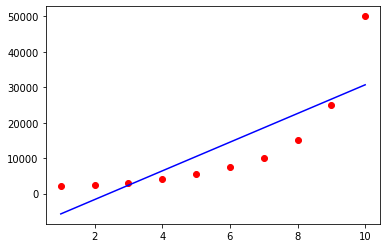

In [4]:
# Lineer Regresyon

lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color = 'blue')
plt.show()

In [23]:
?lin_reg

Type:        LinearRegression
String form: LinearRegression()
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calli

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


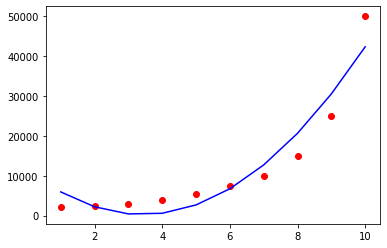

In [5]:
# Polinom Regresyonu

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


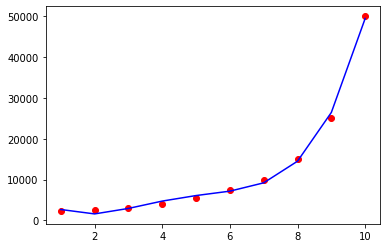

In [6]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

In [22]:
?poly_reg

Type:        PolynomialFeatures
String form: PolynomialFeatures(degree=4)
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\preprocessing\_polynomial.py
Docstring:  
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Read more in the :ref:`User Guide <polynomial_features>`.

Parameters
----------
degree : int or tuple (min_degree, max_degree), default=2
    If a single int is given, it specifies the maximal degree of the
    polynomial features. If a tuple `(min_degree, max_degree)` is passed,
    then `min_degree` is the minimum and `max_degree` is the maximum
    polynomial degree of the generated features. Note that `min_degree=0`
    and `min_degree=1` are equivalen

In [7]:
# Tahminler

print(f"11 numaralı eğitim seviyesi için ödenmesi gereken maaş tahmini: {lin_reg.predict([[11]])}")
print(f"6.6 numaralı eğitim seviyesi için ödenmesi gereken maaş tahmini: {lin_reg.predict([[6.6]])}")


print(f"Tahmin dönüşümü sağlandıktan sonra 11 numaralı eğitim seviyesi için ödenmesi gereken maaş tahmini: {lin_reg2.predict(poly_reg.fit_transform([[6.6]]))}")
print(f"Tahmin dönüşümü sağlandıktan sonra 11 numaralı eğitim seviyesi için ödenmesi gereken maaş tahmini: {lin_reg2.predict(poly_reg.fit_transform([[11]]))}")

11 numaralı eğitim seviyesi için ödenmesi gereken maaş tahmini: [[34716.66666667]]
6.6 numaralı eğitim seviyesi için ödenmesi gereken maaş tahmini: [[16923.33333333]]
Tahmin dönüşümü sağlandıktan sonra 11 numaralı eğitim seviyesi için ödenmesi gereken maaş tahmini: [[8146.9948718]]
Tahmin dönüşümü sağlandıktan sonra 11 numaralı eğitim seviyesi için ödenmesi gereken maaş tahmini: [[89041.66666665]]


# Destek Vektör Regresyonu (Support Vector Regression)

**Doğrusal SVR (linear SVR)**
<br>
${\displaystyle y = {\sum_{i=1}^N}(\alpha_i - \alpha_i^*).{\langle x_i , x \rangle} +b}$
<br><br>
**Doğrusal Olmayan SVR (non-linear SVR)**
<br>
${\displaystyle y = {\sum_{i=1}^N}(\alpha_i - \alpha_i^*).{\langle \phi (x_i) , \phi (x) \rangle} +b}$
<br>
${\displaystyle y = {\sum_{i=1}^N}(\alpha_i - \alpha_i^*).K(x_i , x) +b}$
<br><br>
**Polinom Fonksiyonu**
<br>
${\displaystyle k(x_i , x_j) = (x_i , x_j)^d}$
<br><br>
**Gauss Radyal Tabanlı Fonksiyon**
<br>
${\displaystyle k(x_i , x_j) = exp(-{\frac {||x_i - x_j||^2}{2 \sigma^2}})}$

In [8]:
# Verileri ölçekleme
sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X)

sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

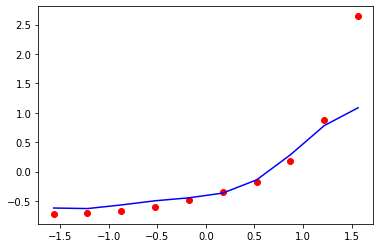

In [9]:
# Regresyon algoritması obje oluşturma
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue')
plt.show()

In [21]:
?svr_reg

Type:        SVR
String form: SVR()
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\svm\_classes.py
Docstring:  
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to datasets with more than a couple of 10000 samples. For large
datasets consider using :class:`~sklearn.svm.LinearSVR` or
:class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
     Specifies the kernel type to be used in the algorithm.
     If none is given, 'rbf' will be used. If a callable is given it is
     used to precompute the kernel matrix.

degree

In [10]:
print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))

[0.01150915]
[0.01150915]


# Karar Ağacı ile Tahmin Algoritması (Decision Tree)

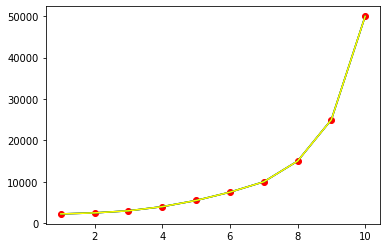

In [14]:
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)
Z = X + 0.5
K = X - 0.4
plt.scatter(X,Y, color='red')
plt.plot(x,r_dt.predict(X), color='blue')
plt.plot(x,r_dt.predict(Z),color='green')
plt.plot(x,r_dt.predict(K),color='yellow')
plt.show();

In [20]:
?r_dt

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(random_state=0)
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadd

In [12]:
print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

[50000.]
[10000.]


# Rassal Ağaçlar (Random FOrest)

## Kollektif Öğrenme

* Boosting
    * Bagging
        * Random Forest
    * AdaBoost
* Stacking
    * Blending
    * MAVL

In [16]:
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())
print(rf_reg.predict([[6.6]]))

[10500.]


In [19]:
?rf_reg

Type:        RandomForestRegressor
String form: RandomForestRegressor(n_estimators=10, random_state=0)
Length:      10
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"squared_error", "absolute_error", "poisson"},             default="squared_error"
    The function t

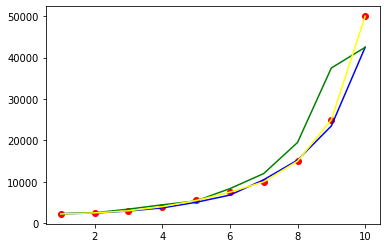

In [18]:
plt.scatter(X,Y,color='red')
plt.plot(X,rf_reg.predict(X),color='blue')
plt.plot(X,rf_reg.predict(Z),color='green')
plt.plot(x,r_dt.predict(K),color='yellow')
plt.show();

# Yöntemleri Karşılaştırma

## R2 (R-Square, R-Kare) Yöntemi

Hata Kareleri Toplamı = Topla${\displaystyle (y_i - y_i')^2}$
<br>
Ortalama Farkların Toplamı = Topla${\displaystyle (y_i - y_{ort})^2}$
<br><br>
${\displaystyle R^2 = 1- {\frac {HKT}{OFT}}}$
<br><br><br>
## Düzeltilmiş R2 (Adjusted R2) Yöntemi
${\displaystyle Düzeltilmiş R^2 = 1 - (1 - R^2) {\frac {n - 1}{n - p - 1}}}$

In [25]:
?r2_score

Signature:
r2_score(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
:math:`R^2` (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a :math:`R^2` score of 0.0.

Read more in the :ref:`User Guide <r2_score>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average', 'variance_weighted'},             array-like of shape (n_outputs,) or None, default='uniform_average'

    Defines aggregating of multiple output scores.
    Array

In [30]:
print('Random Forest R2 Değerleri')
print(f"Random Forest X Değeri: {r2_score(Y, rf_reg.predict(X))}")
print(f"Random Forest K Değeri: {r2_score(Y, rf_reg.predict(K))}")
print(f"Random Forest Z Değeri: {r2_score(Y, rf_reg.predict(Z))}")

#Ozet R2 değerleri
print('-----------------------')
print(f"Linear R2 Değeri:\t {r2_score(Y, lin_reg.predict(X))}")
print(f"Polynomial R2 Değeri:\t {r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)))}")
print(f"SVR R2 Değeri:\t\t {r2_score(y_olcekli, svr_reg.predict(x_olcekli))}")
print(f"Decision Tree R2 Değeri: {r2_score(Y, r_dt.predict(X))}")
print(f"Random Forest R2 Değeri: {r2_score(Y, rf_reg.predict(X))}")

Random Forest R2 Değerleri
Random Forest X Değeri: 0.9704434230386582
Random Forest K Değeri: 0.9704434230386582
Random Forest Z Değeri: 0.8820523231127324
-----------------------
Linear R2 Değeri:	 0.6690412331929894
Polynomial R2 Değeri:	 0.9973922891706614
SVR R2 Değeri:		 0.7513836788854973
Decision Tree R2 Değeri: 1.0
Random Forest R2 Değeri: 0.9704434230386582
